In [1]:
"""
FIX_intro_py.py =========================================================

Einfaches Code-Beispiel zum Thema Fixpoint-Quantisierung

Demonstriere:
- Quantisierungskennlinie
- Wellenform eines quantisierten Signals

bei verschiedenen Arten der Quantisierung und der Sättigung

(c) 2016 Christian Münker - Files zur Vorlesung "DSV auf FPGAs"
=========================================================================
"""

'\nFIX_intro_py.py =========================================================\n\nEinfaches Code-Beispiel zum Thema Fixpoint-Quantisierung\n\nDemonstriere:\n- Quantisierungskennlinie\n- Wellenform eines quantisierten Signals\n\nbei verschiedenen Arten der Quantisierung und der Sättigung\n\n(c) 2016 Christian Münker - Files zur Vorlesung "DSV auf FPGAs"\n=========================================================================\n'

In [2]:
from __future__ import print_function, division
import os, sys
import time

module_path = os.path.abspath(os.path.join('..')) # append directory one level up to import path
if module_path not in sys.path:  # ... if it hasn't been appended already
    sys.path.append(module_path)
import dsp_fpga_lib as dsp # import and set plot properties
import dsp_fpga_fix_lib as fx

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure, plot, stem, grid, xlabel, ylabel, \
    subplot, title, clf, xlim, ylim
#%matplotlib notebook
%matplotlib inline
plt.rcParams["figure.figsize"] = [15, 6]
# plt.style.use('../script.mplstyle')
import numpy as np
from numpy import sin, cos, tan, angle, pi, array, arange, log10, zeros, \
  linspace, ones, sqrt

Anzahl der Überläufe =  5000
Total CPU time: 2.508 ms


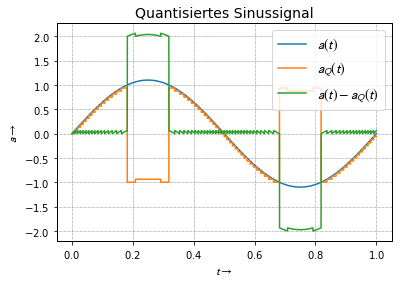

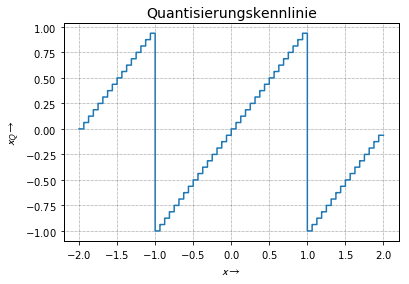

In [3]:
N = 10000; f_a = 1
t = linspace(0, 1, N, endpoint=False)
a = 1.1 * sin(2 * pi * f_a * t)
x = linspace(-2, 2, N, endpoint=False) 
#
#q_obj = (0, 4, 'round', 'sat') # try 'round' ; 'sat'
q_obj = {'QI':0, 'QF': 4, 'quant':'floor', 'ovfl': 'wrap'} # try 'round' ; 'sat'
#q_obj = {'OVFL':'sat'}
fx_a = fx.Fixed(q_obj)
fx_x = fx.Fixed(q_obj)

t_cpu = time.clock()

aq = fx_a.fix(a) # quantize a
xq = fx_x.fix(x) # quantize x
print('Anzahl der Überläufe = ', fx_x.N_over) 
print ('Total CPU time: %.5g ms' %((time.clock()-t_cpu)*1000))

#
figure(1)
title('Quantisiertes Sinussignal')
plot(t, a, label = r'$a(t)$')
plt.step(t, aq, where = 'post', label = r'$a_Q(t)$')
plot(t, a-aq, label = r'$a(t) - a_Q(t)$')
plt.legend(fontsize = 14)
plt.grid(True)
xlabel(r'$t \rightarrow$'); ylabel(r'$a \rightarrow$')
#
figure(2)
title('Quantisierungskennlinie')
plt.step(x,xq, where = 'post')
xlabel(r'$x \rightarrow$'); ylabel(r'$x_Q \rightarrow$')
plt.show()